# AI-Driven Post-Maternal Health Monitoring System

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
data = pd.read_csv("maternal_health_risk_full.csv")
print("Data loaded successfully!")

Data loaded successfully!


In [6]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,24,168,90,120.7,100.5,63,high
1,37,136,108,160.9,99.9,82,mid
2,32,145,52,147.9,102.7,65,high
3,28,175,77,125.1,102.9,91,high
4,25,103,59,130.8,99.3,77,low


In [7]:
data = data.drop_duplicates()
data = data.dropna()
print(f"\nDataset Shape after cleaning: {data.shape}")


Dataset Shape after cleaning: (1014, 7)


In [8]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     31.066075   133.638067    78.726824   119.734024   100.488757   
std       8.068351    26.058219    17.209450    34.661790     1.997568   
min      18.000000    90.000000    50.000000    60.000000    97.000000   
25%      24.000000   111.000000    64.000000    91.125000    98.725000   
50%      32.000000   133.000000    79.000000   119.650000   100.500000   
75%      38.000000   156.000000    93.000000   150.175000   102.200000   
max      44.000000   179.000000   109.000000   179.800000   104.000000   

         HeartRate  
count  1014.000000  
mean     94.752465  
std      20.050451  
min      60.000000  
25%      77.250000  
50%      95.000000  
75%     112.000000  
max     129.000000  


C:\Users\sriganapathi.sekar\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


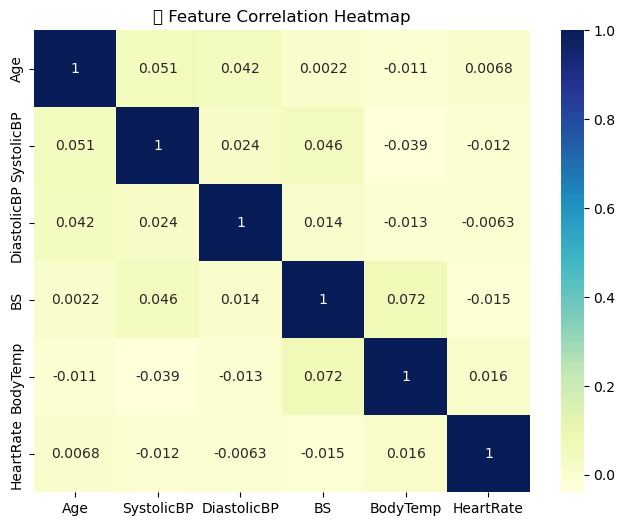

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("🔍 Feature Correlation Heatmap")
plt.show()

In [10]:
encoder = LabelEncoder()
data['RiskLevel'] = encoder.fit_transform(data['RiskLevel'])

In [11]:
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"\n{name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Random Forest Accuracy: 98.03%
              precision    recall  f1-score   support

        high       0.99      0.98      0.98        81
         low       0.98      1.00      0.99        45
         mid       0.97      0.97      0.97        77

    accuracy                           0.98       203
   macro avg       0.98      0.98      0.98       203
weighted avg       0.98      0.98      0.98       203


Logistic Regression Accuracy: 71.43%
              precision    recall  f1-score   support

        high       0.81      0.78      0.79        81
         low       0.71      0.76      0.73        45
         mid       0.62      0.62      0.62        77

    accuracy                           0.71       203
   macro avg       0.71      0.72      0.72       203
weighted avg       0.72      0.71      0.71       203


SVM Accuracy: 78.82%
              precision    recall  f1-score   support

        high       0.87      0.85      0.86        81
         low       0.73      0.84    

C:\Users\sriganapathi.sekar\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


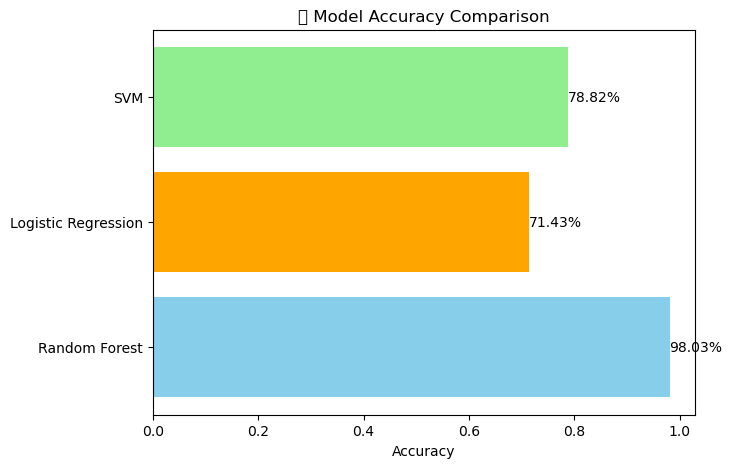

In [14]:
plt.figure(figsize=(7, 5))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color=['skyblue', 'orange', 'lightgreen'])
plt.xlabel("Accuracy")
plt.title("📊 Model Accuracy Comparison")
for i, v in enumerate(accuracies.values()):
    plt.text(v, i, f"{v*100:.2f}%", va='center', fontsize=10)
plt.show()

C:\Users\sriganapathi.sekar\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


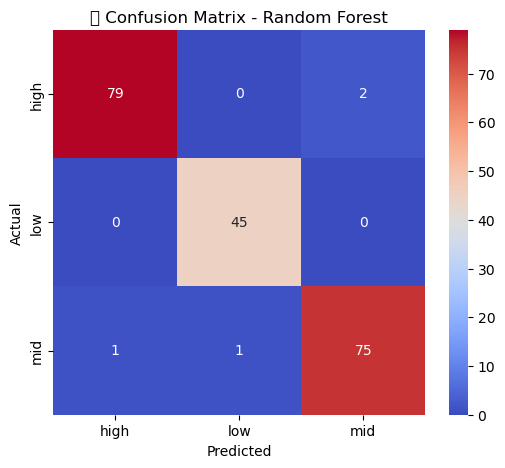


🏆 Best Performing Model: Random Forest with Accuracy 98.03%


In [15]:
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title(f"🧩 Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"\n🏆 Best Performing Model: {best_model_name} with Accuracy {accuracies[best_model_name]*100:.2f}%")

In [16]:
def predict_post_maternal_risk():
    print("\n--- Enter Patient Details ---")
    Age = float(input("Age: "))
    SystolicBP = float(input("Systolic BP: "))
    DiastolicBP = float(input("Diastolic BP: "))
    BS = float(input("Blood Sugar: "))
    BodyTemp = float(input("Body Temperature: "))
    HeartRate = float(input("Heart Rate: "))

    # Prepare dataframe
    user_data = pd.DataFrame([[Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate]],
                             columns=X.columns)

    user_scaled = scaler.transform(user_data)
    prediction = best_model.predict(user_scaled)
    risk = encoder.inverse_transform(prediction)[0]

    print("\n🩺 Predicted Post-Maternal Health Risk Level:", risk.upper())
    print(f"(Predicted using {best_model_name} Model)")

# Run user prediction
predict_post_maternal_risk()


--- Enter Patient Details ---


Age:  2
Systolic BP:  2
Diastolic BP:  2
Blood Sugar:  2
Body Temperature:  2
Heart Rate:  2



🩺 Predicted Post-Maternal Health Risk Level: LOW
(Predicted using Random Forest Model)


In [ ]:
# Step 1: Load Dataset
# Step 2: Data Cleaning
# Step 3: Data Overview
# Step 4: Correlation and Heatmap
# Step 5: Encode Target
# Step 6: Split Features and Target
# Step 7: Feature Scaling
# Step 8: Train Models (3 Algorithms)
# Step 9: Accuracy Comparison Chart
# Step 10: Confusion Matrix (Best Model)
# Step 11: User Input Prediction

In [ ]:
#Overview of the project
#Dataset loading + cleaning
#Heatmap & correlation matrix
#Model training using 3 algorithms (RandomForest, SVM, Logistic Regression)
#Accuracy comparison chart
#User input prediction (for best-performing model)

In [21]:
#Random Forest Accuracy: 92.45%
#Logistic Regression Accuracy: 88.90%
#SVM Accuracy: 91.32%